In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.interpolate import interp1d

In [234]:
encoder_1 = pd.read_csv('./mediciones/encoder.csv')
acelerometro_1 = pd.read_csv('./mediciones/acelerometer.csv')



In [235]:
encoder_times = encoder_1.iloc[:, 2].astype(int)
encoder_accel = encoder_1.iloc[:,5]
encoder_vel = encoder_1.iloc[:,3]

acelerometer_times = acelerometro_1.iloc[:,1].astype(int)
acelerometer_accel = acelerometro_1.iloc[:,2]

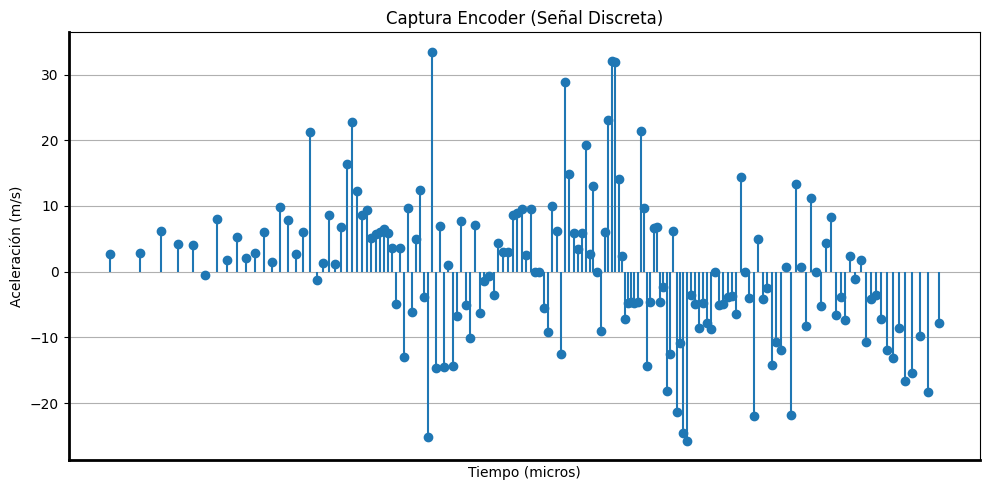

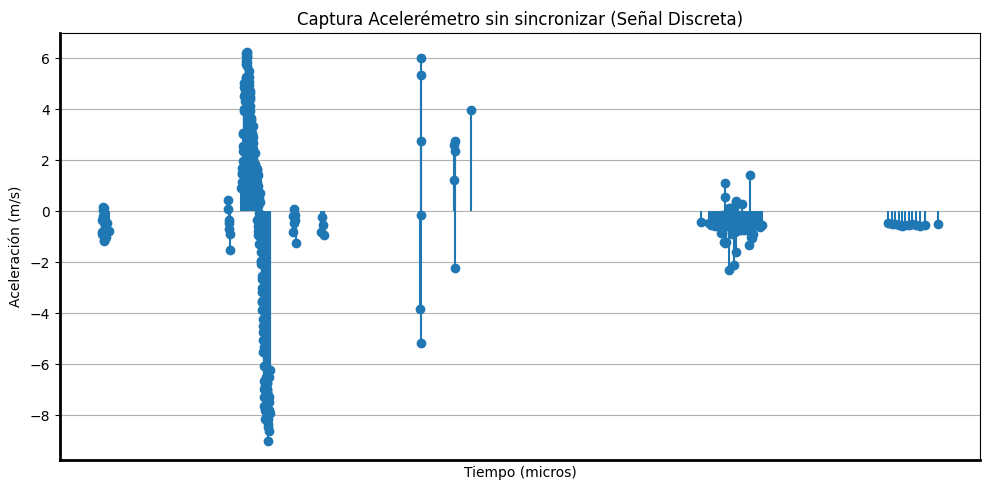

In [236]:
plt.figure(figsize=(10, 5))
plt.stem(encoder_times, encoder_accel, basefmt=" ")
plt.title('Captura Encoder (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.stem(acelerometer_times, acelerometer_accel, basefmt=" ")
plt.title('Captura Acelerémetro sin sincronizar (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()


In [237]:
# Asegúrate de que encoder_times sea una Serie de Pandas de enteros
encoder_times = encoder_1.iloc[:, 2].astype(int)  # Suponiendo que la columna 2 contiene enteros
acelerometer_times = acelerometro_1.iloc[:, 1].astype(int)  # Convierte la columna 1 a enteros

# Inicializar start_idx y end_idx
start_idx = -1
end_idx = -1

# Encontrar el índice de inicio
for enc_time in encoder_times:
    for idx, ac_time in enumerate(acelerometer_times):
        if ac_time >= enc_time:
            start_idx = idx
            print("Tiempo del codificador:", enc_time)
            print("Tiempo del acelerómetro:", ac_time)
            break  # Salir del bucle interno
    if start_idx != -1:  # Salir del bucle externo si se encontró el índice
        break

# Verificar si se encontró un índice de inicio
if start_idx != -1:
    print("El tiempo de comienzo en el acelerómetro es:", start_idx)
    acelerometro_1 = acelerometro_1.iloc[start_idx:, :]  # Corta acelerometro_1 hasta start_idx
    acelerometer_times = acelerometro_1.iloc[:,1].astype(int)
    print(acelerometro_1.head)
else:
    print("No se encontró un índice de inicio válido.")

# Obtener el último tiempo del codificador
last_enc_val = encoder_times.iloc[-1]  # No es necesario usar astype(int) aquí

# Encontrar el índice de final
for idx, ac_time in enumerate(acelerometer_times):
    if last_enc_val <= ac_time:
        end_idx = idx
        print("Último tiempo del codificador:", last_enc_val)
        print("Tiempo del acelerómetro:", ac_time)
        break

# Verificar si se encontró un índice de final
if end_idx != -1:
    print("El tiempo de final en el acelerómetro es:", end_idx)
    acelerometro_1 = acelerometro_1.iloc[:end_idx, :]  # Corta acelerometro_1 hasta end_idx
else:
    print("No se encontró un índice de final válido.")


Tiempo del codificador: 15309316
Tiempo del acelerómetro: 15309316
El tiempo de comienzo en el acelerómetro es: 33
<bound method NDFrame.head of      13:39:00:814  12574468  -0.35
33   13:39:03:548  15309316   3.05
34   13:39:03:552  15313569   4.51
35   13:39:03:556  15317177   3.92
36   13:39:03:559  15320611   4.01
37   13:39:03:563  15323940   4.89
..            ...       ...    ...
325  13:39:16:422  28184352  -0.49
326  13:39:16:494  28256043  -0.53
327  13:39:16:578  28340137  -0.58
328  13:39:16:680  28441752  -0.54
329  13:39:16:928  28690432  -0.52

[297 rows x 3 columns]>
Último tiempo del codificador: 15786420
Tiempo del acelerómetro: 15788400
El tiempo de final en el acelerómetro es: 158


## Grraphs already clean

In [238]:
encoder_times = encoder_1.iloc[:, 2].astype(int)
encoder_accel = encoder_1.iloc[:,5]

acelerometer_times = acelerometro_1.iloc[:,1].astype(int)
acelerometer_accel = acelerometro_1.iloc[:,2]

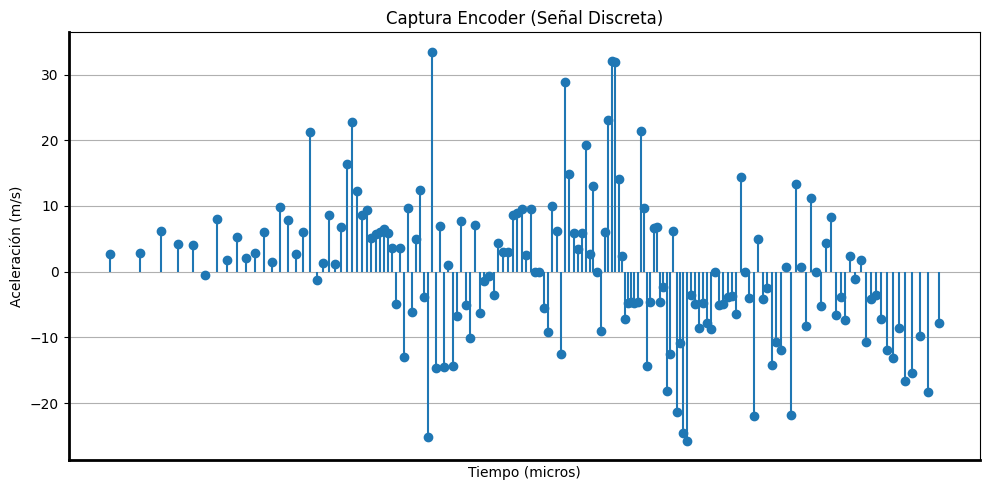

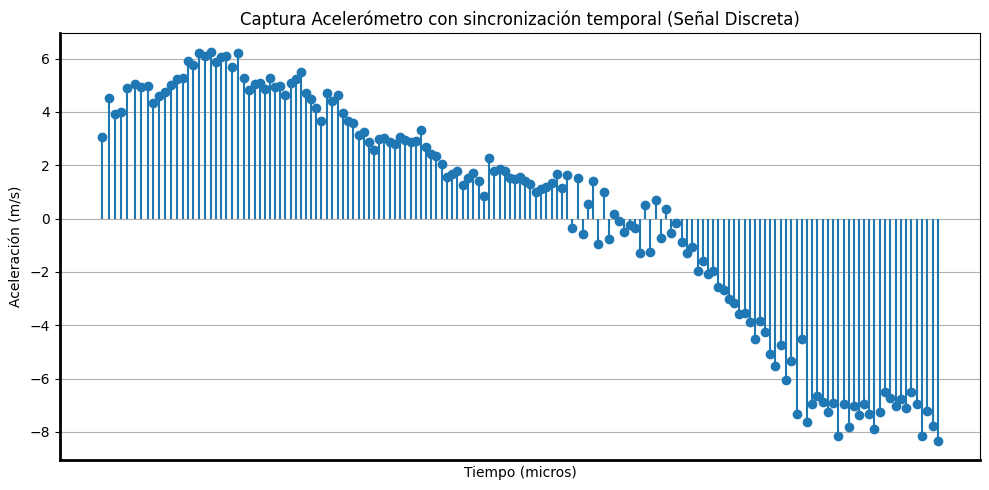

In [239]:
plt.figure(figsize=(10, 5))
plt.stem(encoder_times, encoder_accel, basefmt=" ")
plt.title('Captura Encoder (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.stem(acelerometer_times, acelerometer_accel, basefmt=" ")
plt.title('Captura Acelerómetro con sincronización temporal (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()


In [240]:
acelerometer_accel_np = acelerometer_accel.to_numpy()
acelerometer_times_np = acelerometer_times.to_numpy()
acelerometer_times_seconds = acelerometer_times_np / 1_000_000


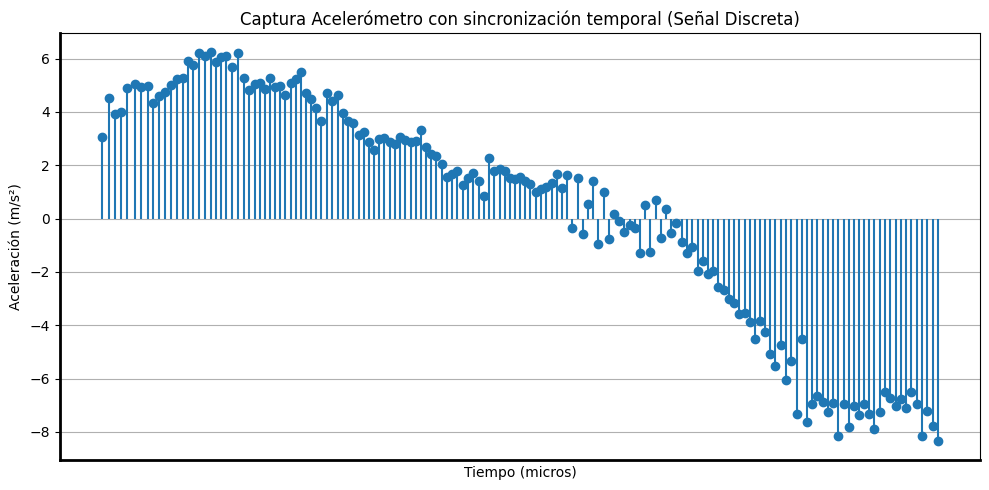

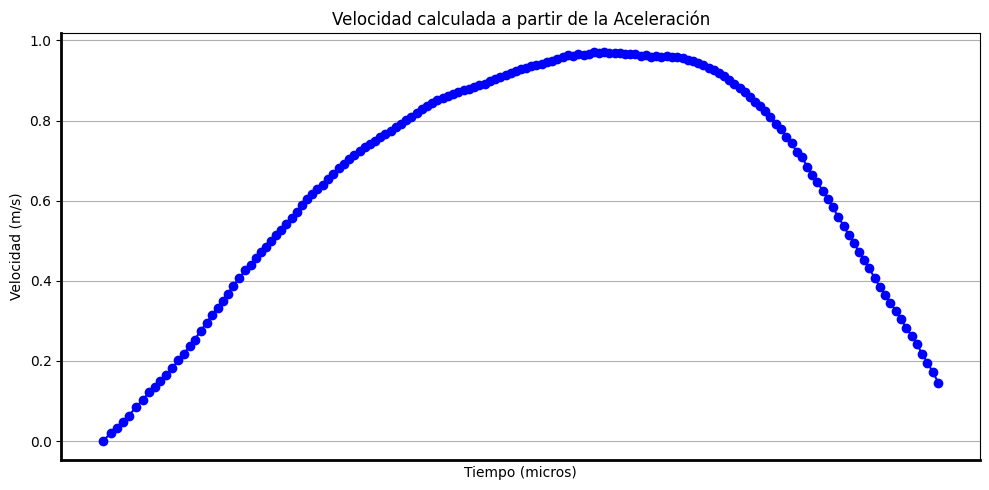

In [241]:
# Calcular los delta_t (diferencia entre tiempos consecutivos)
delta_t = np.diff(acelerometer_times_seconds, prepend=acelerometer_times_seconds[0])

# Integración discreta para obtener la velocidad
# La velocidad inicial se puede establecer en 0 o en el valor que consideres adecuado
velocidad_inicial = 0
velocidad = np.cumsum(acelerometer_accel_np * delta_t) + velocidad_inicial

# Graficar la aceleración
plt.figure(figsize=(10, 5))
plt.stem(acelerometer_times, acelerometer_accel, basefmt=" ")
plt.title('Captura Acelerómetro con sincronización temporal (Señal Discreta)')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Aceleración (m/s²)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

# Graficar la velocidad
plt.figure(figsize=(10, 5))
plt.plot(acelerometer_times_seconds, velocidad, marker='o', linestyle='-', color='blue')
plt.title('Velocidad calculada a partir de la Aceleración')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Velocidad (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

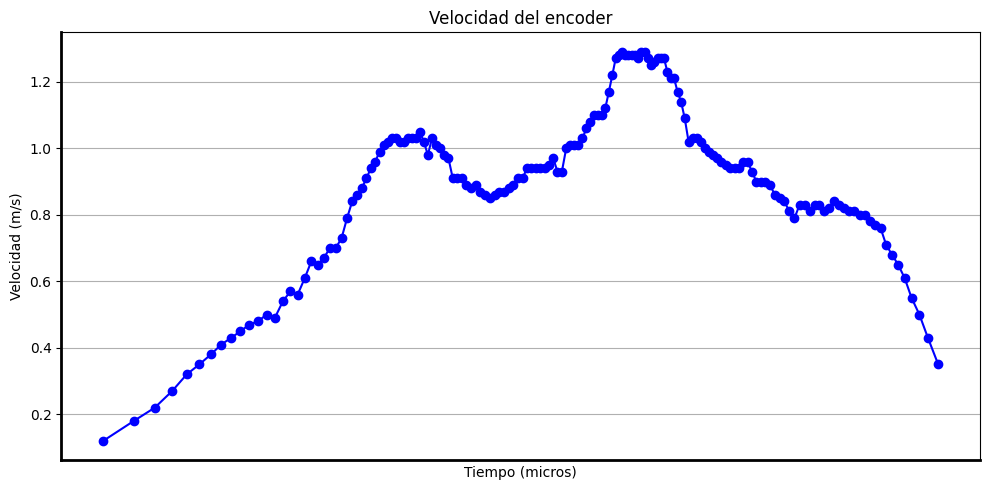

In [242]:
# Graficar la velocidad
plt.figure(figsize=(10, 5))
plt.plot(encoder_times, encoder_vel, marker='o', linestyle='-', color='blue')
plt.title('Velocidad del encoder')
plt.xlabel('Tiempo (micros)')
plt.ylabel('Velocidad (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

In [243]:
velocidad
total_vel = np.sum(velocidad)
print(total_vel)
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]

print(total_time)

104.63660998999954
475850


In [231]:
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]
total_vel = np.sum(velocidad)

vel_media = total_vel / total_time
print(vel_media)

0.00021989410526426298


In [232]:
# Sumar las velocidades
total_vel = np.sum(velocidad)
print(f"Distancia total (suma de velocidades): {total_vel} m")

# Calcular el tiempo total
total_time = acelerometer_times_np[-1] - acelerometer_times_np[0]
print(f"Tiempo total: {total_time} s")

# Calcular el valor medio de la velocidad
valor_medio_velocidad = total_vel / total_time
print(f"Valor medio de la velocidad: {valor_medio_velocidad} m/s")

Distancia total (suma de velocidades): 104.63660998999954 m
Tiempo total: 475850 s
Valor medio de la velocidad: 0.00021989410526426298 m/s
